# **Data Collection**

## Objectives

* Clean the datasets
* Handling null value

## Inputs

* Kaggle JSON file - download Kaggle data

## Outputs

* Generate Datasets:
** /inputs/housing-prices-data/house-price-20211124T154130Z-001/house-price/house_prices_records.csv
** /inputs/housing-prices-data/house-price-20211124T154130Z-001/house-price/inherited_houses.csv

## Additional Comments




---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Project_05/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Project_05'

# Load data

In [4]:
import pandas as pd
df = pd.read_csv(f"/workspace/Project_05/inputs/housing-prices-data/house-price-20211124T154130Z-001/house-price/house_prices_records.csv")
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


# Data exploration

# Overview

---

+ Overview of the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1460 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1346 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1298 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

## Import numpy, seaborn and pyplot


+ As part of the data cleaning, using numpy, seaborn, and pyplot are necessary

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Missing data

+ by using df.isnull.sum(), as can be seen there are couple of missing datas, those are 2ndFlrSF, BedroomAbvGr, EnclosedPorch, GarageFinish, GarageYrBlt, LotFrontage, and LotFrontage

In [7]:
df.isnull().sum()

1stFlrSF            0
2ndFlrSF           86
BedroomAbvGr       99
BsmtExposure        0
BsmtFinSF1          0
BsmtFinType1      114
BsmtUnfSF           0
EnclosedPorch    1324
GarageArea          0
GarageFinish      162
GarageYrBlt        81
GrLivArea           0
KitchenQual         0
LotArea             0
LotFrontage       259
MasVnrArea          8
OpenPorchSF         0
OverallCond         0
OverallQual         0
TotalBsmtSF         0
WoodDeckSF       1305
YearBuilt           0
YearRemodAdd        0
SalePrice           0
dtype: int64

## Filling the missing data

**Observation**
+ Using average to fill null value continue variable
+ Using model to fill the null value of categorical variable

In [8]:
for feature in df.columns:
  if df[feature].dtype == "object" :
    df[feature] = df[feature].fillna(df[feature].mode()[0])
  else :
    df[feature] = df[feature].fillna(df[feature].mean())

In [9]:
df.isnull().sum()

1stFlrSF         0
2ndFlrSF         0
BedroomAbvGr     0
BsmtExposure     0
BsmtFinSF1       0
BsmtFinType1     0
BsmtUnfSF        0
EnclosedPorch    0
GarageArea       0
GarageFinish     0
GarageYrBlt      0
GrLivArea        0
KitchenQual      0
LotArea          0
LotFrontage      0
MasVnrArea       0
OpenPorchSF      0
OverallCond      0
OverallQual      0
TotalBsmtSF      0
WoodDeckSF       0
YearBuilt        0
YearRemodAdd     0
SalePrice        0
dtype: int64

## Dimension reduction

+ In this section will be reducing the number of column so the data easier to read and understand.

### BsmtExposure reduction

<AxesSubplot:>

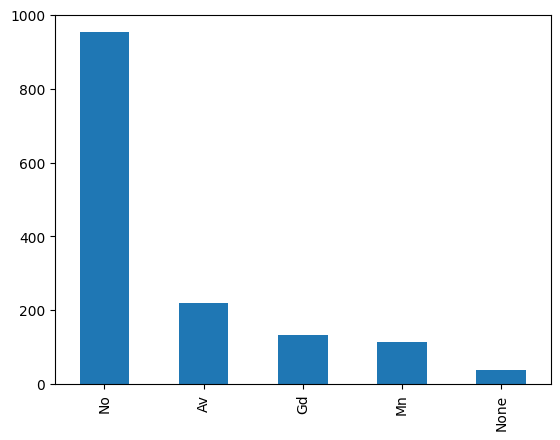

In [10]:
df['BsmtExposure'].value_counts().plot.bar()

+ as can be seen the data has been spread too thin

In [11]:
df["BsmtExposure"]=df['BsmtExposure'].replace(["Av","Gd","Mn","None"],"Yes")

<AxesSubplot:>

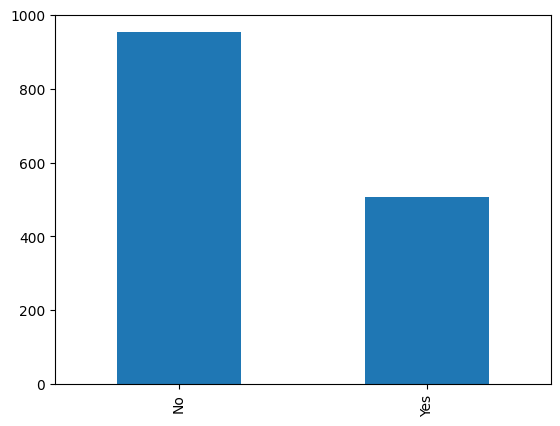

In [12]:
df['BsmtExposure'].value_counts().plot.bar()

+ with this code, the graph will be combining Av, Gd, Mn, and None together.
+ Replace it with "Yes"

### BsmtFinType1 reduction

<AxesSubplot:>

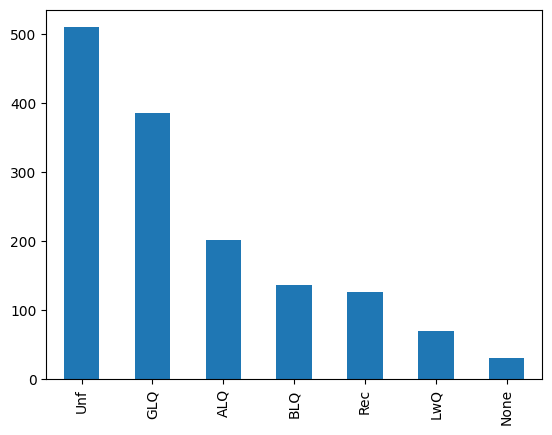

In [13]:
df["BsmtFinType1"].value_counts().plot.bar()

+ as can be seen have graphs spread too thin, with the next code it will be simplfied

In [14]:
df["BsmtFinType1"]=df['BsmtFinType1'].replace({"ALQ":"BLQ","Rec":"LwQ","None":"LwQ"})

<AxesSubplot:>

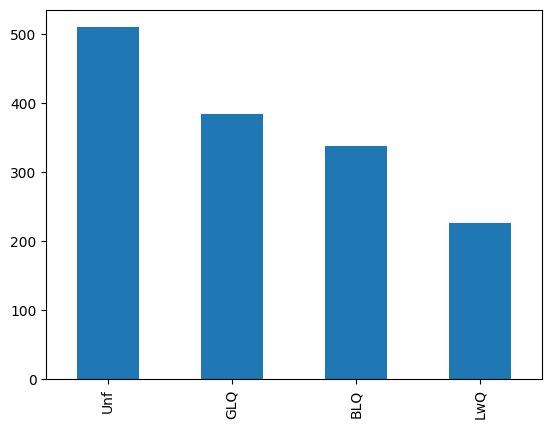

In [15]:
df["BsmtFinType1"].value_counts().plot.bar()

+ As result the data have been all packed into four different graphs

### GarageFinish regression

+ For the GarageFinish, None will be mixed together with Fin

<AxesSubplot:>

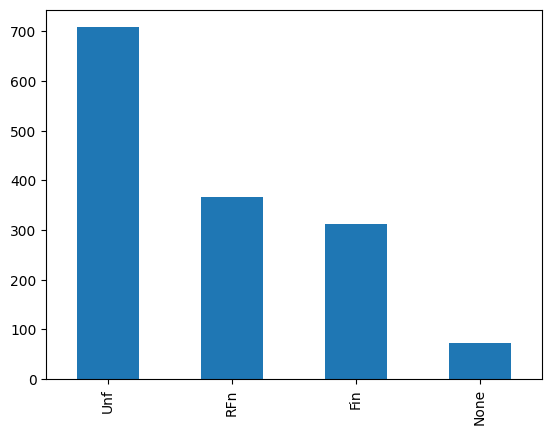

In [16]:
df["GarageFinish"].value_counts().plot.bar()

In [17]:
df["GarageFinish"]=df['GarageFinish'].replace({"None":"Fin"})

<AxesSubplot:>

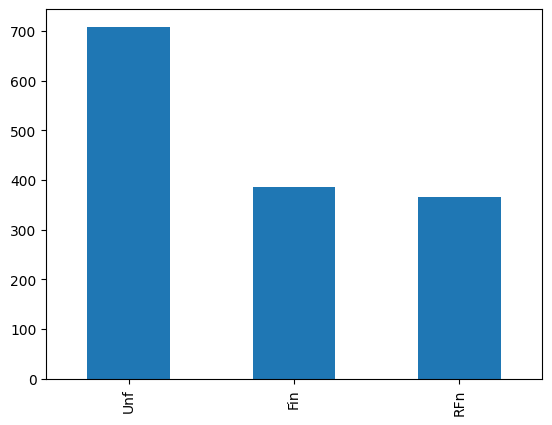

In [18]:
df["GarageFinish"].value_counts().plot.bar()

+ As can be seen there are three bar charts for the GarageFinish

### KitchenQual regression

+ KitchenQual will also be regress

<AxesSubplot:>

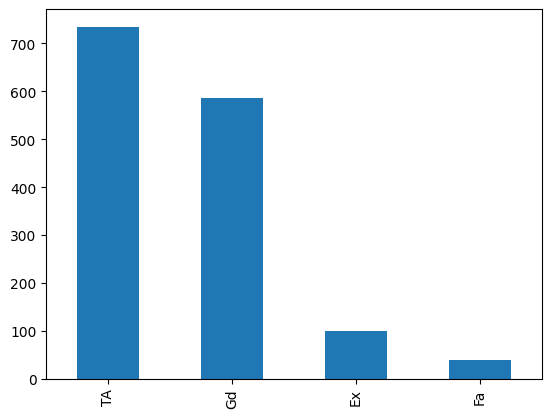

In [19]:
df["KitchenQual"].value_counts().plot.bar()

+ As can be seen the graph Ex and Fa are almost the same amount

In [20]:
df["KitchenQual"]=df["KitchenQual"].replace({"Ex":"Fa"})

<AxesSubplot:>

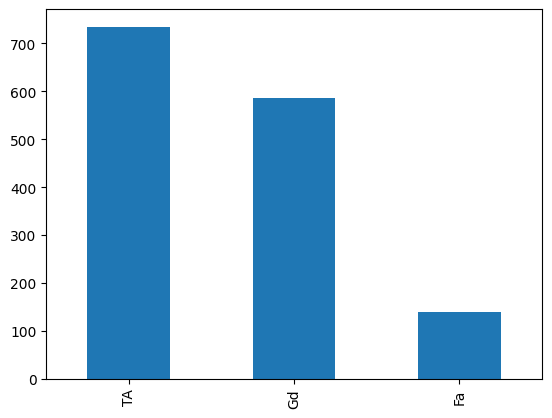

In [21]:
df["KitchenQual"].value_counts().plot.bar()

+ As result KitchenQual only have three graphs

## Outlier treatment 

+ Among the data there are some datas that are having outlier on the right, as can be seen below:
    + 1st floor SF - normal distribution outlier right handside
    + BedroomAbvGr - normal distribution outlier right handside
    + BsmtFinSF1 - exponential distribution outlier right handside feature value at 0
    + GarageArea - normal distribution outlier right handside feature engineer value at 0 (GarageArea_0)
    + GrLivArea - normal distribution outlier right handside
    + LotArea - normal distribution extreme outlier right handside
    + LotFrontage - normal distribution outlier right handside
    + TotalBsmtSF - Semi normal distribution outlier right handside
    + SalePrice - normal distribution extreme outlier right handside

In [22]:
oulier_features = ["1stFlrSF","BedroomAbvGr","BsmtFinSF1","GarageArea","GrLivArea","LotArea","LotFrontage","TotalBsmtSF"]
for feat in oulier_features:
  df[feat]=np.where(df[feat]>df[feat].quantile(0.95),df[feat]<df[feat].quantile(0.05),df[feat])

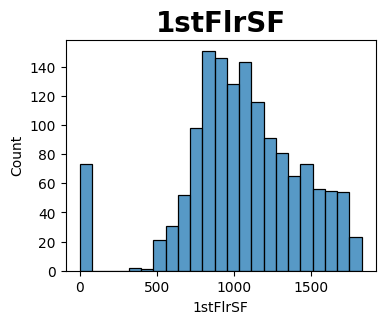

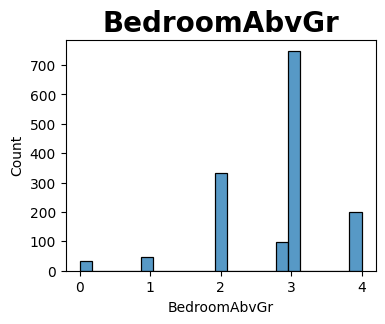

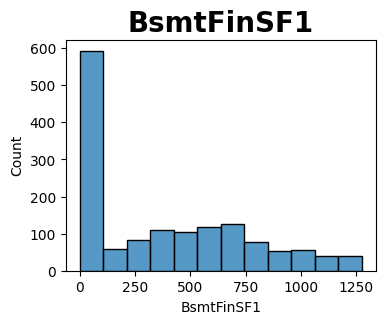

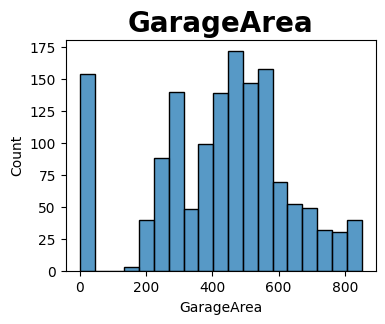

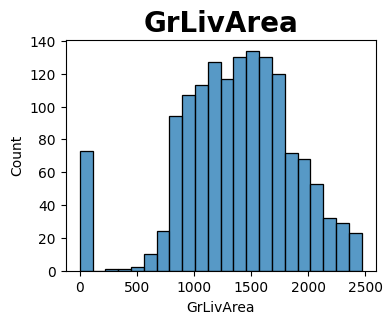

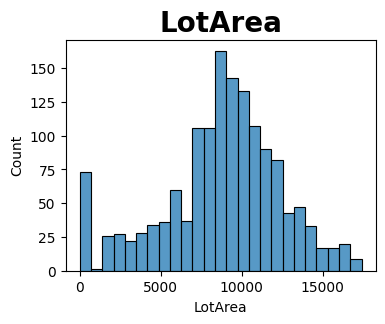

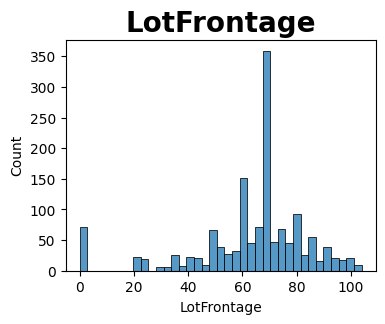

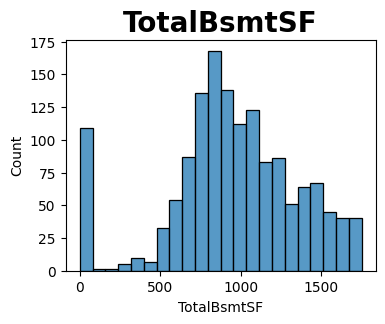

In [23]:
for feat in oulier_features:
  plt.figure(figsize=(4,3))
  sns.histplot(data=df, x=feat)
  plt.title(feat, fontsize=20, fontweight="bold")
  plt.show()

+ Explain

## One hot encoding

In [24]:
df.select_dtypes("object").columns

Index(['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual'], dtype='object')

In [25]:
features = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']
df = pd.get_dummies(df,columns=features)
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,...,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Unf,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,856,854.000000,3.000000,706,150,0.000000,548,2003.0,1710,8450,...,0,1,0,0,0,1,0,0,1,0
1,1262,0.000000,3.000000,978,284,25.330882,460,1976.0,1262,9600,...,1,0,0,0,0,1,0,0,0,1
2,920,866.000000,3.000000,486,434,0.000000,608,2001.0,1786,11250,...,0,1,0,0,0,1,0,0,1,0
3,961,348.524017,2.869214,216,540,25.330882,642,1998.0,1717,9550,...,1,0,0,0,0,0,1,0,1,0
4,1145,348.524017,4.000000,655,490,0.000000,836,2000.0,2198,14260,...,0,1,0,0,0,1,0,0,1,0


In [26]:
df.shape

(1460, 32)

## Train test split

+ Splitting data into train test, this is done to prevent overfitting and test is reserve to simulate real world perdiction.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   1stFlrSF          1460 non-null   int64  
 1   2ndFlrSF          1460 non-null   float64
 2   BedroomAbvGr      1460 non-null   float64
 3   BsmtFinSF1        1460 non-null   int64  
 4   BsmtUnfSF         1460 non-null   int64  
 5   EnclosedPorch     1460 non-null   float64
 6   GarageArea        1460 non-null   int64  
 7   GarageYrBlt       1460 non-null   float64
 8   GrLivArea         1460 non-null   int64  
 9   LotArea           1460 non-null   int64  
 10  LotFrontage       1460 non-null   float64
 11  MasVnrArea        1460 non-null   float64
 12  OpenPorchSF       1460 non-null   int64  
 13  OverallCond       1460 non-null   int64  
 14  OverallQual       1460 non-null   int64  
 15  TotalBsmtSF       1460 non-null   int64  
 16  WoodDeckSF        1460 non-null   float64


In [28]:
df.columns

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtUnfSF',
       'EnclosedPorch', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'LotArea',
       'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd',
       'SalePrice', 'BsmtExposure_No', 'BsmtExposure_Yes', 'BsmtFinType1_BLQ',
       'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Unf',
       'GarageFinish_Fin', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA'],
      dtype='object')

In [29]:
feature = ['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtUnfSF',
       'EnclosedPorch', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'LotArea',
       'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd',
      'BsmtExposure_No', 'BsmtExposure_Yes',
       'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ',
       'BsmtFinType1_Unf', 'GarageFinish_Fin', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA']
target = ["SalePrice"]

In [40]:
X = df[feature]
y = df[target]

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .3 , random_state=42)

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 135 to 1126
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   1stFlrSF          1022 non-null   int64  
 1   2ndFlrSF          1022 non-null   float64
 2   BedroomAbvGr      1022 non-null   float64
 3   BsmtFinSF1        1022 non-null   int64  
 4   BsmtUnfSF         1022 non-null   int64  
 5   EnclosedPorch     1022 non-null   float64
 6   GarageArea        1022 non-null   int64  
 7   GarageYrBlt       1022 non-null   float64
 8   GrLivArea         1022 non-null   int64  
 9   LotArea           1022 non-null   int64  
 10  LotFrontage       1022 non-null   float64
 11  MasVnrArea        1022 non-null   float64
 12  OpenPorchSF       1022 non-null   int64  
 13  OverallCond       1022 non-null   int64  
 14  OverallQual       1022 non-null   int64  
 15  TotalBsmtSF       1022 non-null   int64  
 16  WoodDeckSF        1022 non-null   float6

In [44]:
X_train.shape

(1022, 31)

In [45]:
X_test.shape

(438, 31)

**Observation**
+ 1022 rows for training data sets with 31 features
+ 438 rows for testing sets with 31 features

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [30]:
import os
try:
  os.makedirs(name='outputs/datasets/cleaned')
except Exception as e:
  print(e)




[Errno 17] File exists: 'outputs/datasets/cleaned'


## Cleaned data

In [31]:
df.to_csv(f"outputs/datasets/cleaned/HousePricesCleaned.csv",index=False)

## Train split result

In [48]:
train=X_train.copy()
train["SalePrice"]=y_train
train.to_csv(f"outputs/datasets/cleaned/TrainSplitResult.csv")

## Test split result

In [49]:
test=X_test.copy()
test["SalePrice"]=y_test
test.to_csv(f"outputs/datasets/cleaned/TestSplitResult.csv")